In [ ]:
# Create plots to check if the model is at equilibrium

In [1]:
import xmitgcm
from xmitgcm import open_mdsdataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
from xgcm import Grid
import numba

In [2]:
# function to load in the data
# data_dir is location of data
# prefix is type of data to load in (dyn, layersDiags)
def getoutput(data_dir,prefix):
    deltaTClock = 21600.
    grid_dir = './K50grid/'
    data = open_mdsdataset(data_dir,grid_dir,delta_t=deltaTClock,prefix=prefix,geometry='sphericalpolar',default_dtype=np.dtype)
    return data

In [3]:
dyn50=getoutput('./K50/','dyn')
dyn500=getoutput('./K500/','dyn')
dyn5000=getoutput('./K5000/','dyn')

In [5]:
def equilibrium(dyn):
    weight=dyn['drF']
    weightx=dyn['dxF']
    weighty=dyn['dyF']
    timer = (((dyn.weighted(weighty*weightx)).mean('YC')).mean('XC')).weighted(weight).mean('Z')
    
    return timer

In [7]:
timer50=equilibrium(dyn50)
#timer500=equilibrium(dyn500)
#timer5000=equilibrium(dyn5000)

Text(0.5, 1.0, 'K = 50')

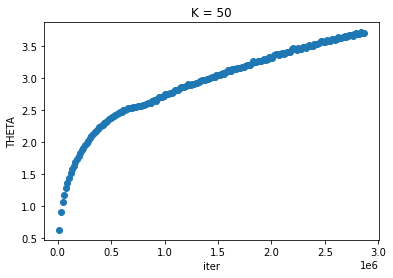

In [8]:
timer50.plot.scatter(x='iter',y='THETA')
plt.title('K = 50')
#plt.savefig('TEMP_time_K50.png')